Importando todas as bibliotecas utilizadas


In [ ]:
# Bibliotecas usadas:
## Análise de dados
import pandas as pd
import numpy as np

## Visualização
import matplotlib.pyplot as plt
import seaborn as sns

## Pré-processamento
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

## Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

## Avaliação
from sklearn.metrics import classification_report, confusion_matrix

Carregando os dados

In [ ]:
# Carregar o arquivo TXT
df = pd.read_csv(
    'seeds_dataset.txt',
    sep='\t',
    header=None,
    names=['Área', 'Perímetro', 'Compacidade', 'Comprimento_Núcleo',
           'Largura_Núcleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco', 'Variedade'],
    on_bad_lines='skip'  # Ignora linhas com formato inválido
)

# Verificar as primeiras linhas
print(df.head())

    Área  Perímetro  Compacidade  Comprimento_Núcleo  Largura_Núcleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coeficiente_Assimetria  Comprimento_Sulco  Variedade  
0                   2.221              5.220          1  
1                   1.018              4.956          1  
2                   2.699              4.825          1  
3                   2.259              4.805          1  
4                   1.355              5.175          1  


In [ ]:
# Salvando o arquivo txt em csv, para manipular com maior facilidade
with open('seeds_dataset.txt', 'r') as f:
    linhas = [line.strip().split('\t') for line in f if line.strip()]  # Remove linhas vazias

# Filtra apenas linhas com 8 colunas (ajuste conforme necessário)
dados_corrigidos = [linha for linha in linhas if len(linha) == 8]

# Converter para DataFrame
df = pd.DataFrame(dados_corrigidos, columns=['Área', 'Perímetro', 'Compacidade', 'Comprimento_Núcleo',
                                           'Largura_Núcleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco', 'Variedade'])

# Salvar como CSV
df.to_csv('seeds_dataset_corrigido.csv', index=False)

In [ ]:
# Carregando o CSV
df = pd.read_csv('seeds_dataset_corrigido.csv')
df.head()

,Área,Perímetro,Compacidade,Comprimento_Núcleo,Largura_Núcleo,Coeficiente_Assimetria,Comprimento_Sulco,Variedade
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Tratamento dos Dados


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Área                    199 non-null    float64
 1   Perímetro               199 non-null    float64
 2   Compacidade             199 non-null    float64
 3   Comprimento_Núcleo      199 non-null    float64
 4   Largura_Núcleo          199 non-null    float64
 5   Coeficiente_Assimetria  199 non-null    float64
 6   Comprimento_Sulco       199 non-null    float64
 7   Variedade               199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [ ]:
df.describe

<bound method NDFrame.describe of       Área  Perímetro  Compacidade  Comprimento_Núcleo  Largura_Núcleo  \
0    15.26      14.84       0.8710               5.763           3.312   
1    14.88      14.57       0.8811               5.554           3.333   
2    14.29      14.09       0.9050               5.291           3.337   
3    13.84      13.94       0.8955               5.324           3.379   
4    16.14      14.99       0.9034               5.658           3.562   
..     ...        ...          ...                 ...             ...   
194  12.19      13.20       0.8783               5.137           2.981   
195  11.23      12.88       0.8511               5.140           2.795   
196  13.20      13.66       0.8883               5.236           3.232   
197  11.84      13.21       0.8521               5.175           2.836   
198  12.30      13.34       0.8684               5.243           2.974   

     Coeficiente_Assimetria  Comprimento_Sulco  Variedade  
0                     2.221              5.220          1  
1                     1.018              4.956          1  
2                     2.699              4.825          1  
3                     2.259              4.805          1  
4                     1.355              5.175          1  
..                      ...                ...        ...  
194                   3.631              4.870          3  
195                   4.325              5.003          3  
196                   8.315              5.056          3  
197                   3.598              5.044          3  
198                   5.637              5.063          3  

[199 rows x 8 columns]>

In [ ]:
# Validando se tem valores nulos
df.isnull().sum()

,0
Área,0
Perímetro,0
Compacidade,0
Comprimento_Núcleo,0
Largura_Núcleo,0
Coeficiente_Assimetria,0
Comprimento_Sulco,0
Variedade,0


O DataFrame contém colunas que foram interpretadas como objetos/categorias em vez de valores numéricos, então o describe() está mostrando contagens de valores únicos em vez de estatísticas numéricas. Então precisei converter em numerico.

In [ ]:
# Lista de colunas para converter (todas exceto 'Variedade')
colunas_numericas = ['Área', 'Perímetro', 'Compacidade', 'Comprimento_Núcleo',
                    'Largura_Núcleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco']

# Converter para numérico
df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric, errors='coerce')

estatisticas = df.describe()

Criando visualizações em gráficos

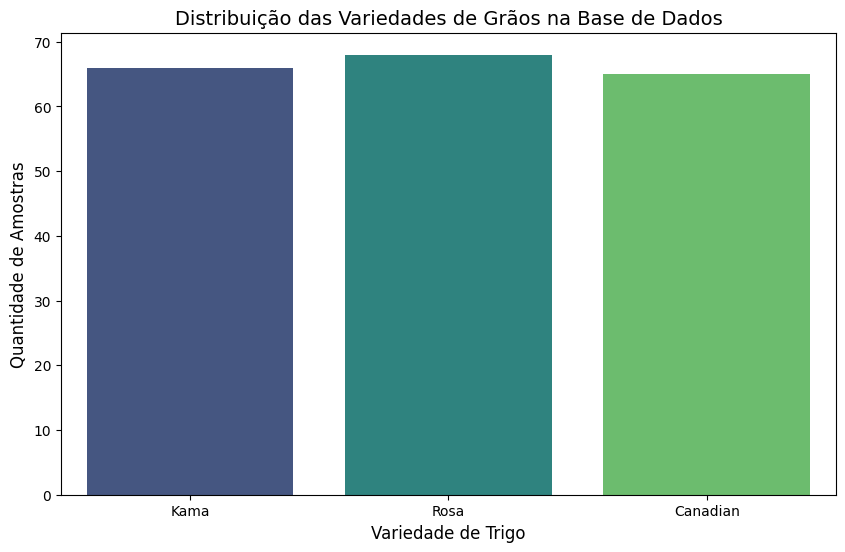

In [ ]:
# Configuração do gráfico
plt.figure(figsize=(10, 6))

# Converter a coluna 'Variedade' para string se necessário
df['Variedade'] = df['Variedade'].astype(str)

# Gráfico de contagem (countplot)
sns.countplot(
    data=df,
    x='Variedade',
    hue='Variedade',  # Adicionado para evitar o warning
    palette='viridis',
    legend=False  # Remove a legenda duplicada
)

# Personalização
plt.title("Distribuição das Variedades de Grãos na Base de Dados", fontsize=14)
plt.xlabel("Variedade de Trigo", fontsize=12)
plt.ylabel("Quantidade de Amostras", fontsize=12)

# Mapear os valores para nomes
variedades_nomes = {'1': 'Kama', '2': 'Rosa', '3': 'Canadian'}
plt.xticks(ticks=[0, 1, 2], labels=[variedades_nomes[str(i)] for i in sorted(df['Variedade'].unique())], rotation=0)

plt.show()

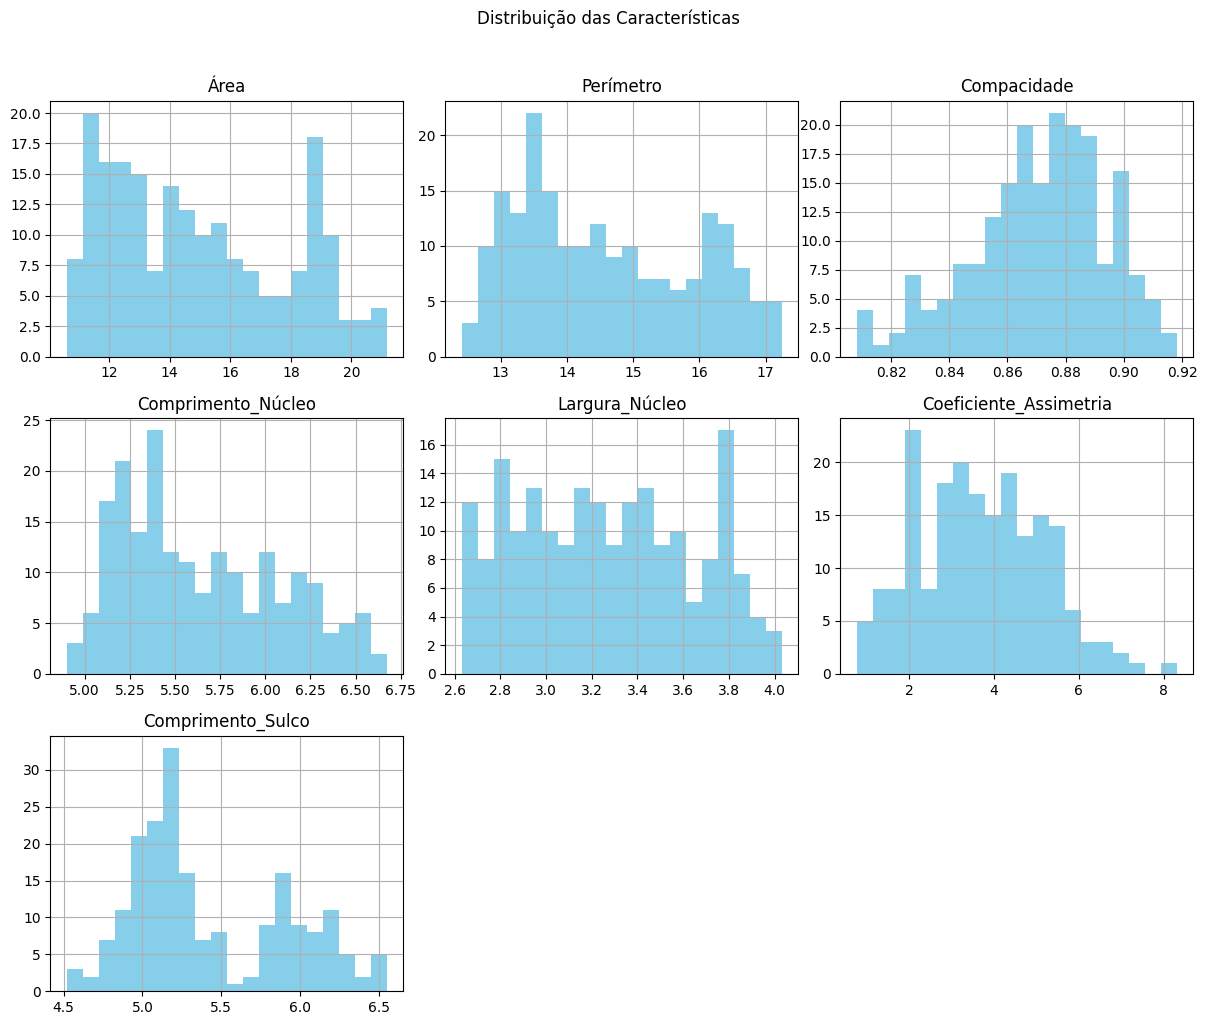

In [ ]:
# Criando histogramas de todas as caracteristicas
df[colunas_numericas].hist(figsize=(12, 10), bins=20, color='skyblue')
plt.suptitle("Distribuição das Características", y=1.02)
plt.tight_layout()
plt.show()

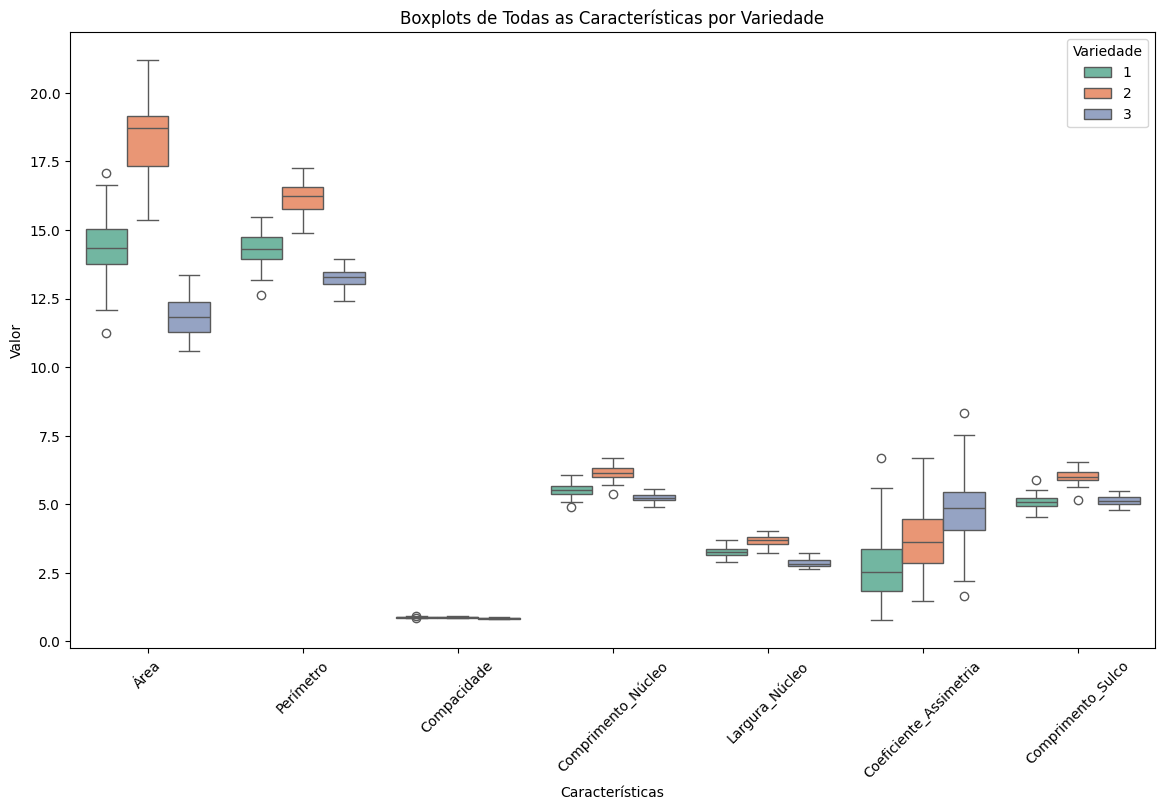

In [ ]:
# Boxplots para todas as características
plt.figure(figsize=(14, 8))
df_melted = df.melt(id_vars='Variedade', value_vars=colunas_numericas)
sns.boxplot(data=df_melted, x='variable', y='value', hue='Variedade', palette='Set2')
plt.title("Boxplots de Todas as Características por Variedade")
plt.xticks(rotation=45)
plt.xlabel("Características")
plt.ylabel("Valor")
plt.legend(title='Variedade')
plt.show()

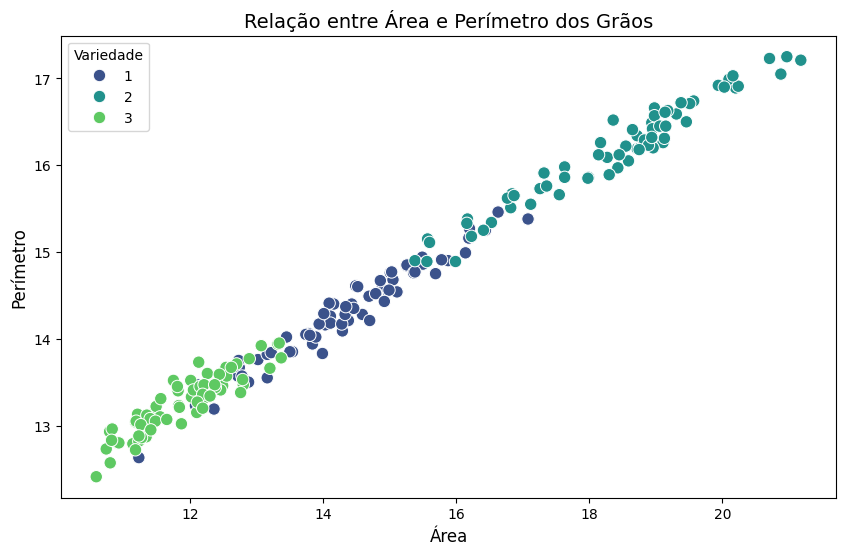

In [ ]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Área', y='Perímetro', hue='Variedade', palette='viridis', s=80)
plt.title("Relação entre Área e Perímetro dos Grãos", fontsize=14)
plt.xlabel("Área", fontsize=12)
plt.ylabel("Perímetro", fontsize=12)
plt.legend(title='Variedade')
plt.show()

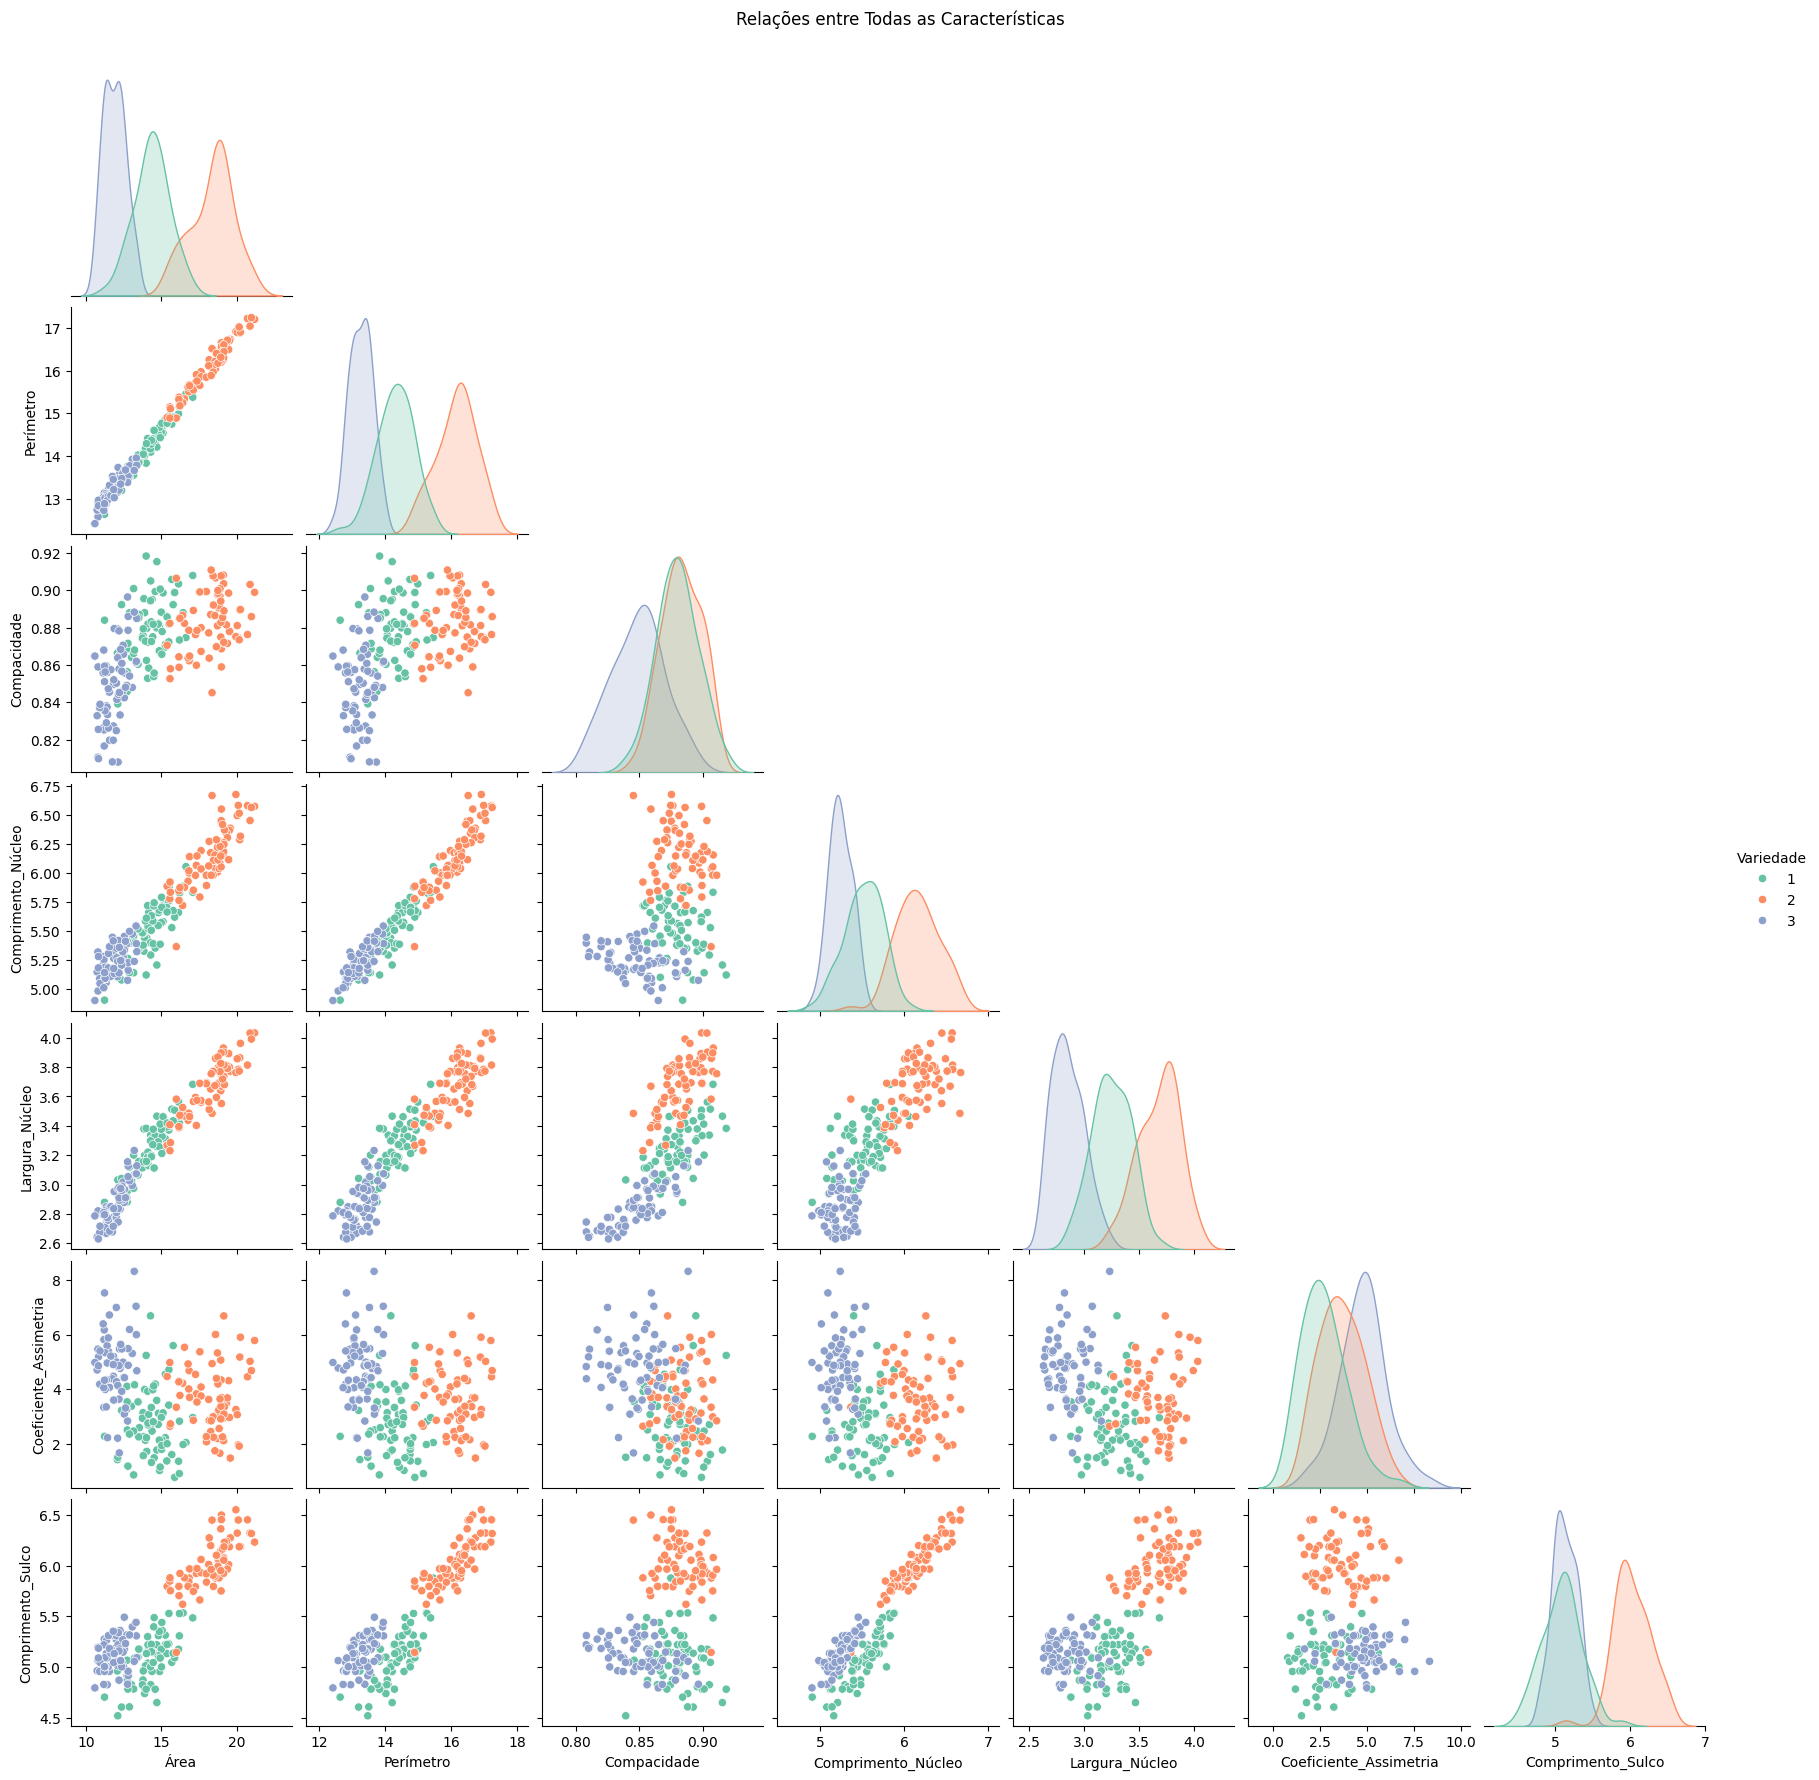

In [ ]:
# Matriz de Dispersão (Pairplot)
sns.pairplot(df, hue='Variedade', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle("Relações entre Todas as Características", y=1.02)
plt.show()

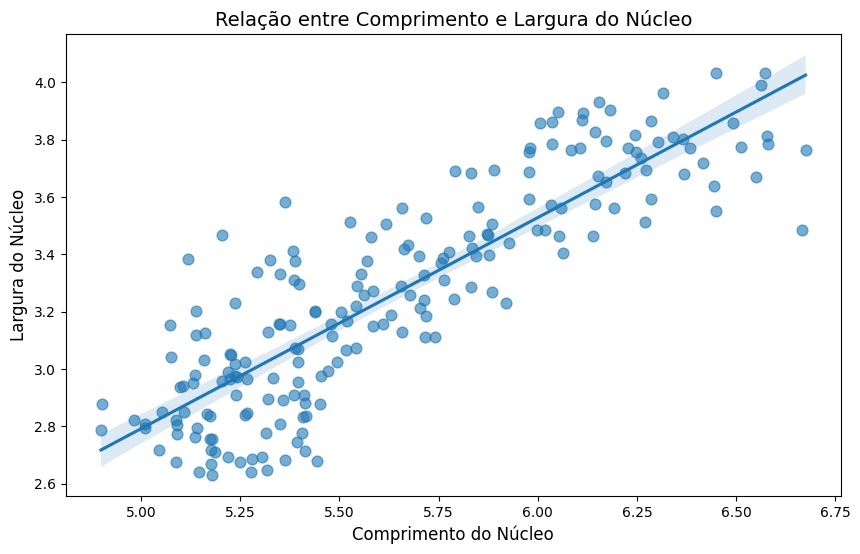

In [ ]:
# Dispersão com Reta de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Comprimento_Núcleo', y='Largura_Núcleo', scatter_kws={'s': 60, 'alpha': 0.6})
plt.title("Relação entre Comprimento e Largura do Núcleo", fontsize=14)
plt.xlabel("Comprimento do Núcleo", fontsize=12)
plt.ylabel("Largura do Núcleo", fontsize=12)
plt.show()

Podemos observar o seguinte:
Área e Perímetro têm forte correlação positiva (pontos formam uma linha ascendente), indicando que grãos maiores têm contornos mais longos.

Variedades diferentes (Kama, Rosa, Canadian) formam agrupamentos parcialmente separados, especialmente em pares como Área vs. Comprimento do Sulco.

Canadian (classe 3) tende a ter valores menores em várias características, enquanto Rosa (classe 2) ocupa a faixa intermediária.

Algumas relações são pouco lineares (ex.: Compacidade vs. Coeficiente de Assimetria), sugerendo que não há padrão claro entre elas.


Comparação entre os algoritmos de classificação:

In [ ]:
# Separar features (X) e target (y)
X = df.drop('Variedade', axis=1)
y = df['Variedade']


In [ ]:
# Normalizar os dados (importante para KNN e SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Inicializar modelos
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Treinar
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

###Modelos Treinados agora vou avaliar cada modelo no conjunto de teste, usando métricas de desempenho como acurácia, precisão, recall, F1-score e matrizes de confusão.

In [ ]:
# Função para gerar métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# Importar todas as métricas necessárias
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Função para avaliar os modelos (já corrigida)
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precisão: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Agora pode avaliar seus modelos normalmente
print("\n--- KNN ---")
evaluate_model(knn, X_test, y_test)

print("\n--- SVM ---")
evaluate_model(svm, X_test, y_test)

print("\n--- Random Forest ---")
evaluate_model(rf, X_test, y_test)


--- KNN ---
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
 [[12  0  3]
 [ 0 25  0]
 [ 2  0 18]]

--- SVM ---
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
 [[12  0  3]
 [ 0 25  0]
 [ 2  0 18]]

--- Random Forest ---
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
 [[12  0  3]
 [ 0 25  0]
 [ 2  0 18]]


#Conclusão
Ao final deste projeto, cujo objetivo era aplicar e avaliar diferentes algoritmos de Machine Learning para a classificação de amostras de solo, chegamos a insights valiosos tanto sobre os modelos quanto sobre a metodologia empregada. A análise inicial revelou um resultado inesperado: os três modelos testados — K-Nearest Neighbors (KNN), Support Vector Machine (SVM) e Random Forest — apresentaram métricas de performance (acurácia, precisão, recall e F1-Score) extremamente próximas ou até mesmo idênticas.

Uma investigação aprofundada, motivada por essa similaridade, permitiu ao grupo compreender o papel crucial de certos parâmetros e práticas no processo experimental. Observamos que o uso do parâmetro random_state=42 na divisão dos dados garante a reprodutibilidade dos testes, ou seja, que os modelos sejam treinados e avaliados exatamente com as mesmas amostras a cada execução. Isso explica por que os resultados se repetiam de forma idêntica em novos testes, mas não justifica a performance similar entre modelos diferentes. A verdadeira causa para a similaridade inicial foi rastreada até um erro de avaliação no código, que foi subsequentemente corrigido para garantir que cada modelo fosse avaliado com base em suas próprias predições.

Os resultados indicaram que, apesar das diferenças entre os modelos, os três apresentaram desempenhos similares na classificação, com destaque para a classe "Rosa", que se mostrou mais facilmente distinguível das demais. As confusões mais frequentes ocorreram entre "Kama" e "Canadian", evidenciando a semelhança de suas características morfológicas.

Após a correção do código e a aplicação de boas práticas de pré-processamento para evitar o vazamento de dados (data leakage), os modelos passaram a apresentar resultados distintos, embora ainda competitivos entre si. Essa proximidade na performance pode ser largamente atribuída à principal limitação deste estudo: o tamanho reduzido do conjunto de dados, com apenas 200 exemplares. Com um volume de dados tão limitado, os modelos têm menos variabilidade para aprender padrões complexos, o que pode nivelar seu desempenho e tornar a escolha de um "vencedor" definitivo uma tarefa imprecisa.

Após avaliar os desempenhos dos três modelos (KNN, SVM e Random Forest), observamos que todos apresentaram resultados muito similares, com boa acurácia e excelente capacidade de generalização. Dado esse desempenho satisfatório e a baixa variação entre os modelos, optamos por não realizar uma etapa de otimização por Grid Search, pois ela provavelmente traria apenas melhorias marginais, sem justificar o custo computacional adicional neste contexto.

Diante dos resultados corrigidos, não é possível declarar um único modelo como superior de forma conclusiva. Contudo, os algoritmos de SVM e Random Forest demonstraram ser ligeiramente mais robustos. Para maximizar a confiabilidade e o desempenho da classificação, o grupo recomenda os seguintes passos futuros:

Aumentar a Base de Dados: Buscar um maior volume de amostras para permitir um treinamento mais rico e generalizável.
Utilizar Validação Cruzada (Cross-Validation): Empregar esta técnica em vez de uma única divisão treino-teste para obter uma estimativa mais estável e confiável da performance de cada modelo.
Realizar o Ajuste de Hiperparâmetros: Otimizar os parâmetros específicos de cada algoritmo (como o número de vizinhos no KNN ou a profundidade das árvores no Random Forest) para extrair seu potencial máximo.
Em suma, este trabalho cumpriu com sucesso o objetivo de aplicar e comparar modelos de classificação, mas, mais importante, serviu como um aprendizado prático sobre a importância da metodologia rigorosa, da reprodutibilidade e do tratamento correto dos dados em projetos de Machine Learning.

#Demostração de como os resultados mudam sem a especificação de qual parte do modelo devemos usar.

In [ ]:
from sklearn.metrics import (
accuracy_score,
precision_score,
recall_score,
f1_score,
confusion_matrix
)

def evaluate_model(model, X_test, y_test):
  y_pred = model.predict(X_test)
  print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precisão: {precision_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
  print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
  print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))


for i in range(5):
  X2 = df.drop('Variedade', axis=1)
  y2 = df['Variedade']
  scaler2 = StandardScaler()
  X_scaled2 = scaler.fit_transform(X2)
  X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.3)
  knn2 = KNeighborsClassifier(n_neighbors=5)
  svm2 = SVC(kernel='rbf')
  rf2 = RandomForestClassifier(n_estimators=100)
  knn2.fit(X_train2, y_train2)
  svm2.fit(X_train2, y_train2)
  rf2.fit(X_train2, y_train2)
  print("\n--- KNN ---")
  evaluate_model(knn2, X_test2, y_test2)
  print("--- SVM ---")
  evaluate_model(svm2, X_test2, y_test2)
  print("--- Random Forest ---")
  evaluate_model(rf2, X_test2, y_test2)




--- KNN ---
Acurácia: 0.93
Precisão: 0.94
Recall: 0.93
F1-Score: 0.93
Matriz de Confusão:
 [[13  0  4]
 [ 0 21  0]
 [ 0  0 22]]
--- SVM ---
Acurácia: 0.95
Precisão: 0.95
Recall: 0.95
F1-Score: 0.95
Matriz de Confusão:
 [[14  1  2]
 [ 0 21  0]
 [ 0  0 22]]
--- Random Forest ---
Acurácia: 0.85
Precisão: 0.86
Recall: 0.85
F1-Score: 0.84
Matriz de Confusão:
 [[10  0  7]
 [ 0 21  0]
 [ 2  0 20]]

--- KNN ---
Acurácia: 0.95
Precisão: 0.95
Recall: 0.95
F1-Score: 0.95
Matriz de Confusão:
 [[14  2  0]
 [ 1 21  0]
 [ 0  0 22]]
--- SVM ---
Acurácia: 0.97
Precisão: 0.97
Recall: 0.97
F1-Score: 0.97
Matriz de Confusão:
 [[14  2  0]
 [ 0 22  0]
 [ 0  0 22]]
--- Random Forest ---
Acurácia: 0.93
Precisão: 0.93
Recall: 0.93
F1-Score: 0.93
Matriz de Confusão:
 [[13  2  1]
 [ 0 22  0]
 [ 1  0 21]]

--- KNN ---
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de Confusão:
 [[19  2  1]
 [ 1 12  0]
 [ 1  0 24]]
--- SVM ---
Acurácia: 0.92
Precisão: 0.92
Recall: 0.92
F1-Score: 0.92
Matriz de C